<a href="https://colab.research.google.com/github/Seghelicious/Carbon-Assessment/blob/main/Carbon_Modelling_Ex_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Carbon Modelling Exercise #1**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12, 7]

from sklearn.calibration import calibration_curve


In [ ]:
ex1 = pd.read_csv('/content/drive/MyDrive/Carbon/Ex1 - Data.csv')

In [ ]:
ex1.head()

,loanid,model1,model2,target,sample
0,1,0.014187,0.010911,0,testing
1,2,0.016760,0.029098,0,testing
2,3,0.015092,0.019482,0,testing
3,4,0.015403,0.019324,0,testing
4,5,0.020180,0.031430,0,testing


In [ ]:
# Model 1 (Training)
model1_training = pd.DataFrame()
model1_training['loanid'] = ex1['loanid']
model1_training['prob_default'] = ex1[ex1['sample'] == 'training']['model1']
model1_training['target'] = ex1['target']
model1_training = model1_training.dropna()

# Model 1 (Validation)
model1_validation = pd.DataFrame()
model1_validation['loanid'] = ex1['loanid']
model1_validation['prob_default'] = ex1[ex1['sample'] == 'validation']['model1']
model1_validation['target'] = ex1['target']
model1_validation = model1_validation.dropna()

# Model 1 (Testing)
model1_testing = pd.DataFrame()
model1_testing['loanid'] = ex1['loanid']
model1_testing['prob_default'] = ex1[ex1['sample'] == 'testing']['model1']
model1_testing['target'] = ex1['target']
model1_testing = model1_testing.dropna()

# Model 2 (Training)
model2_training = pd.DataFrame()
model2_training['loanid'] = ex1['loanid']
model2_training['prob_default'] = ex1[ex1['sample'] == 'training']['model2']
model2_training['target'] = ex1['target']
model2_training = model2_training.dropna()

# Model 2 (Validation)
model2_validation = pd.DataFrame()
model2_validation['loanid'] = ex1['loanid']
model2_validation['prob_default'] = ex1[ex1['sample'] == 'validation']['model2']
model2_validation['target'] = ex1['target']
model2_validation = model2_validation.dropna()

# Model 2 (Testing)
model2_testing = pd.DataFrame()
model2_testing['loanid'] = ex1['loanid']
model2_testing['prob_default'] = ex1[ex1['sample'] == 'testing']['model2']
model2_testing['target'] = ex1['target']
model2_testing = model2_testing.dropna()

Check statistics of models' probabilities of default

In [ ]:
# Model 1
fraction_of_positives1, mean_predicted_value1 = calibration_curve(model1_testing['target'].values, model1_testing['prob_default'].values, n_bins=10)
print(fraction_of_positives1)
print(mean_predicted_value1)

[0.02276485 0.19230769 0.08333333 0.11111111 0.         0.
 0.         0.         0.         0.        ]
[0.01919142 0.12977152 0.23705965 0.36173209 0.46249957 0.53834743
 0.65251543 0.79771217 0.8250187  0.94793326]


In [ ]:
# Model 2
fraction_of_positives2, mean_predicted_value2 = calibration_curve(model2_testing['target'].values, model2_testing['prob_default'].values, n_bins=10)
print(fraction_of_positives2)
print(mean_predicted_value2)

[0.02175032 0.12727273 0.1        0.         0.         0.
 0.         0.        ]
[0.02301153 0.13003067 0.23543236 0.33531563 0.43290978 0.58502546
 0.63098899 0.70801037]


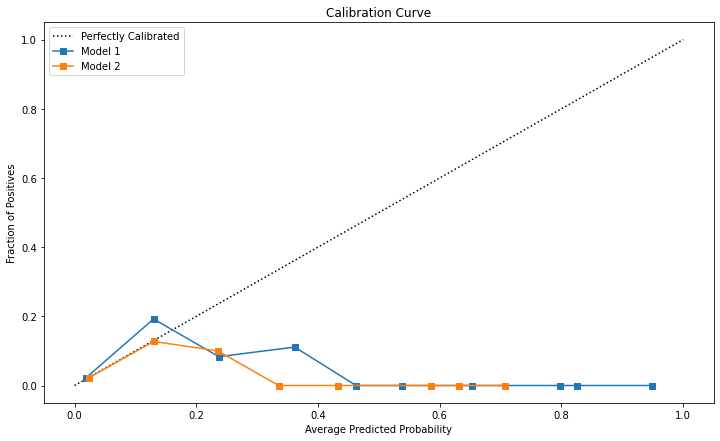

In [ ]:
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly Calibrated')    
plt.plot(mean_predicted_value1, fraction_of_positives1, 's-', label='%s' % 'Model 1')
plt.plot(mean_predicted_value2, fraction_of_positives2, 's-', label='%s' % 'Model 2')
plt.ylabel('Fraction of Positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

To interpret this plot, there are two models - Model 1 and  Model 2. 
- Model 1 predicts a default event while Model 2 does not predict any default event.
- In Model 1 event, there is a 19% default rate with a 13% probability of default.
- When the model predicted probability of default is 13% [0.12977152], most of the loans actually default. 
- Here there is a majority of False Negatives (FN) occur and a default here could result in the loss of the entire loan.
- Model 1 is having some difficulty accurately predicting the probability of default for loans in this sample.
- When the probabilities of default are above 13% (between 24% [0.23705965] and 36% [0.36173209] most of the loans are actually non-defaults. 
- This is where most of the False Positives (FP) exist. These are loans that are declined because the model predicted them as defaults. These are potential loss of profit opportunities. 
- Overall, Model 1 returns more actionnable predictions in more samples than Model 2 does. Consequently, I shall be going forward with Model 1.

### **Compute the threshold value for 80% acceptance rate**


In [ ]:
model1_testing['prob_default'].describe()

count    7965.000000
mean        0.022374
std         0.038473
min         0.011315
25%         0.013701
50%         0.015793
75%         0.020385
max         0.987241
Name: prob_default, dtype: float64

### **Calculate the threshold for a 80% acceptance rate**

In [ ]:
threshold_80 = np.quantile(model1_testing['prob_default'], 0.80)
print(threshold_80)

0.022479830880970324


### **Apply acceptance rate threshold**

In [ ]:
model1_testing['pred_loan_status'] = model1_testing['prob_default'].apply(lambda x: 1 if x > threshold_80 else 0)

# Print the counts of loan status after the threshold
print(model1_testing['pred_loan_status'].value_counts())

0    6372
1    1593
Name: pred_loan_status, dtype: int64


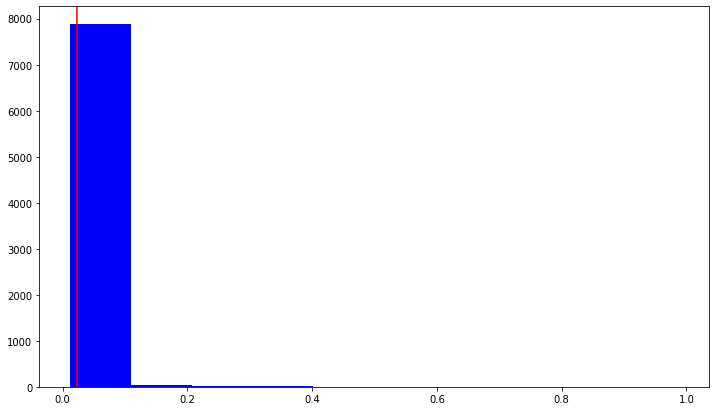

In [ ]:
# Plot the predicted probabilities of default
plt.hist(model1_testing['prob_default'], color = 'blue', bins = 10)

# Calculate the threshold with quantile
threshold = np.quantile(model1_testing['prob_default'], 0.80)

# Add a reference line to the plot for the threshold
plt.axvline(x = threshold, color = 'red')
plt.show()

### **Create a subset of only accepted loans**

In [ ]:
#print(model1_testing.head())
accepted_loans = model1_testing[model1_testing['pred_loan_status'] == 0]
accepted_loans['target'].value_counts()

0    6267
1     105
Name: target, dtype: int64

### **Calculate the bad rate**

In [ ]:
bad_rate = np.sum((accepted_loans['target']) / accepted_loans['target'].count())
print(bad_rate)

0.01647834274952919


In [ ]:
# Set all acceptance rates to test
acceptance_rates = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

# Lists to store all thresholds and bad rates
thresholds = []
bad_rate = []

for rate in acceptance_rates:
  # Calculate threshold
  threshold = np.quantile(model1_training['prob_default'], rate).round(3)
  # Store threshold value in a list
  thresholds.append(np.quantile(model1_validation['prob_default'], rate).round(3))
  # Apply the threshold ro reassign loan status
  model1_testing['pred_loan_status'] = model1_testing['prob_default'].apply(lambda x: 1 if x > threshold else 0)
  # Create accepted loans set of predicted non-defaults
  accepted_loans = model1_testing[model1_testing['pred_loan_status'] == 0]
  # Calculate and store bad rate
  bad_rate.append(np.sum((accepted_loans['target']) / accepted_loans['target'].count()).round(3))

  strategy_df = pd.DataFrame(zip(acceptance_rates, thresholds, bad_rate),
                             columns = ['Acceptance Rate', 'Threshold', 'Bad Rate'])


In [ ]:
strategy_df

,Acceptance Rate,Threshold,Bad Rate
0,1.0,0.978,0.024
1,0.9,0.022,0.018
2,0.8,0.018,0.014
3,0.7,0.017,0.010
4,0.6,0.015,0.009
5,0.5,0.015,0.006
6,0.4,0.014,0.003
7,0.3,0.014,0.003
8,0.2,0.013,0.002
9,0.1,0.013,0.002
